In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from keras.backend import clear_session
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Softmax

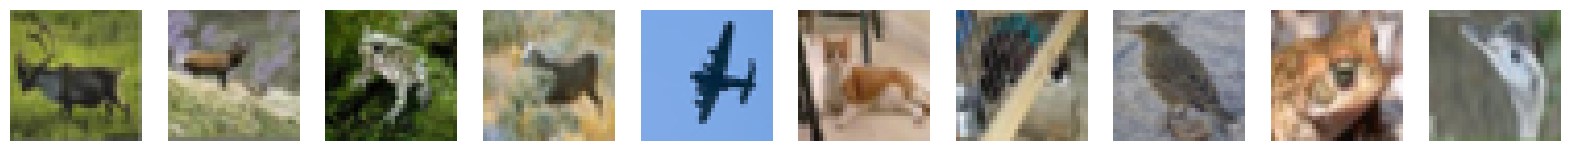

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images by scaling the pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class labels (y_train, y_test) to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Plot a few random images from the training set
def plot_random_images():
    fig, axes = plt.subplots(1, 10, figsize=(20, 2))
    for i in range(10):
        random_idx = np.random.randint(0, len(x_train))
        axes[i].imshow(x_train[random_idx])
        axes[i].axis('off')
    plt.show()

# Call the function to display random images
plot_random_images()

### Add reusable methods for plotting confusion matrix / comparison of accuracy and loss

In [3]:
def show_confusion_matrix(cnn_model, name):
    predictions = cnn_model.predict(x_test)
    predictions = np.argmax(predictions, axis=1)
    gt = np.argmax(y_test, axis=1)
    
    cm = metrics.confusion_matrix(gt, predictions)
    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.savefig(f"output/confusion_matrix_{name}.png")

In [4]:
def show_compare_graph(cnn_history, name):
    plt.title('Loss / Accuracy')
    plt.plot(cnn_history.history['loss'], color='blue', label='train')
    plt.plot(cnn_history.history['accuracy'], color='green', label='train')
    plt.savefig(f"output/compare_graph_{name}.png")

### Define first model with 60 epochs and a batch size of 512

In [5]:
clear_session()

In [6]:
# Define the CNN model
model = Sequential()

# Add a convolutional layer with a 3x3 filter, 32 filters, and input shape (32, 32, 3)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Add a dense layer with 100 units
model.add(Dense(100, activation='relu'))

# Add the output classification layer with softmax activation for 10 classes
model.add(Dense(10, activation='softmax'))

# Print model summary
model.summary()

C:\Users\mktmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=60, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.1560 - loss: 2.2740 - val_accuracy: 0.2529 - val_loss: 2.1658
Epoch 2/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.2564 - loss: 2.1272 - val_accuracy: 0.2888 - val_loss: 2.0312
Epoch 3/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.2973 - loss: 2.0087 - val_accuracy: 0.3014 - val_loss: 1.9666
Epoch 4/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.3243 - loss: 1.9382 - val_accuracy: 0.3381 - val_loss: 1.9113
Epoch 5/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.3467 - loss: 1.8906 - val_accuracy: 0.3513 - val_loss: 1.8628
Epoch 6/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.3539 - loss: 1.8578 - val_accuracy: 0.3444 - val_loss: 1.8467
Epoch 7/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.3708 - loss: 1.8198 - val_accuracy: 0.3497 - val_loss: 1.8384
Epoch 8/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.3748 - loss: 1.7939 - val_accuracy: 0.3834 - v

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step


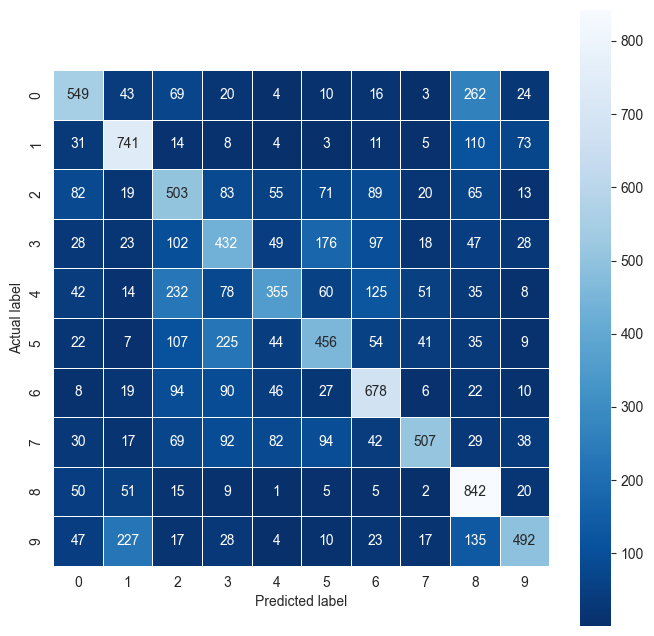

In [27]:
show_confusion_matrix(model, 'model_1')

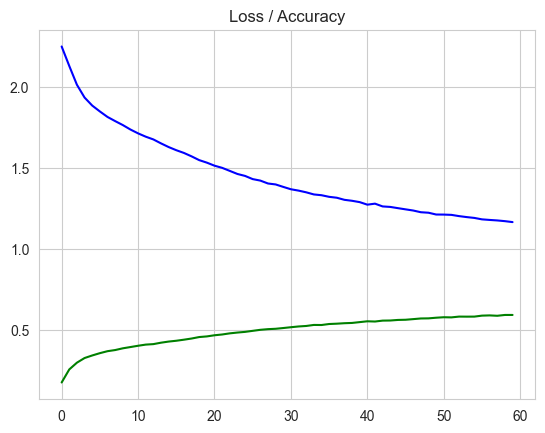

In [30]:
show_compare_graph(history, 'model_1')

As we can see, the result is not very gut. The loss is higher as the accuracy